In [1]:
#Recurrent Neural Networks

In [2]:
#Supervised~
#ANN: used for Regression and Classification
#CNN: used for Computer Vision
#RNN: used for Time Series Analysis
#Unsupervised~
#Self-Organizing Maps: used for Feature Detection
#Deep Boltzmann Machines: used for Recommendation System
#AutoEncoders: used for Recommendation System

In [1]:
#Vanishing Gradient Problem
#Solution to Exploding Gradient~ 
#Truncated Backpropagation
#Penalties
#Gradient Clipping
#Solution to Vanishing Gradient~
#Weight Initialization
#Echo State Networks
#Long Short Term Memories(LSTMs)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Google Stock Market Production for 5 Years
# Importing the training set
training_set = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
training_set
# We will do the analysis only on the open prices

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
5,1/10/2012,313.70,315.72,307.30,621.43,"8,824,000"
6,1/11/2012,310.59,313.52,309.40,624.25,"4,817,800"
7,1/12/2012,314.43,315.26,312.08,627.92,"3,764,400"
8,1/13/2012,311.96,312.30,309.37,623.28,"4,631,800"
9,1/17/2012,314.81,314.81,311.67,626.86,"3,832,800"


In [4]:
# Part1~ Data Preprocessing
training_set = training_set.iloc[:,1:2].values

In [5]:
# Training set has to be a 2D array
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [6]:
# Feature Scaling
# Normalization or Standardization can be used, but we'll use Normalization here
# Beacause we will use sigmoid function in LSTM, so we want our values between 0 to 1
# Normalization: (Xnorm = X - min(X))/(max(X) - min(X))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

In [7]:
training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [8]:
# Getting the inputs and outputs
X_train = training_set[0:1257]#Stock prices at time 't'
y_train = training_set[1:1258]#Stock prices at time 't+1'

In [9]:
X_train

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95163331],
       [0.95725128],
       [0.93796041]])

In [10]:
y_train

array([[0.09701243],
       [0.09433366],
       [0.09156187],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [11]:
# Reshaping
# We'll add one extra dimension for timesteps ((t+1)-(t))
# reshape expects 3 arguments~ batchsize, timestep and no. of features
X_train = np.reshape(X_train, (1257, 1, 1))

In [12]:
X_train

array([[[0.08581368]],

       [[0.09701243]],

       [[0.09433366]],

       ...,

       [[0.95163331]],

       [[0.95725128]],

       [[0.93796041]]])

In [13]:
# X_train is now a 3D array

In [14]:
# Part2~ Building the RNN
# importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

/home/anubansal17/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [15]:
# Initialising the RNN
# As we're making the prediction for some continuous outcome,
# So we'll be making a regression model here
regressor = Sequential()
# As RNN is a sequence of layers, so we're using Sequential Class

In [16]:
# Adding the input layer and LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))
# units implies no. of memory units, activation fxn can be tanh or sigmoid, we can use any of them
# Use parameter tuning to know which fxn would give the better results
# input_shape takes 2 arguments, first is no. of timesteps and other is no. of features
# None implies it can take any timestep, we can also specify exact timestep here

In [17]:
# Adding the output layer
regressor.add(Dense(units = 1))
# units implies no. of neurons in the output layer that depends on dimension which is in our case is 1

In [18]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Generally, we use rmsprop optimizer for RNN but here both would be giving same results, so we've used adam

In [19]:
# Fitting the RNN to training set
regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
1257/1257 [==============================] - 2s 2ms/step - loss: 0.0809
Epoch 2/200
1257/1257 [==============================] - 0s 75us/step - loss: 0.0759
Epoch 3/200
1257/1257 [==============================] - 0s 76us/step - loss: 0.0732
Epoch 4/200
1257/1257 [==============================] - 0s 72us/step - loss: 0.0710
Epoch 5/200
1257/1257 [==============================] - 0s 83us/step - loss: 0.0689
Epoch 6/200
1257/1257 [==============================] - 0s 69us/step - loss: 0.0669
Epoch 7/200
1257/1257 [==============================] - 0s 74us/step - loss: 0.0648
Epoch 8/200
1257/1257 [==============================] - 0s 78us/step - loss: 0.0629
Epoch 9/200
1257/1257 [==============================] - 0s 87us/step - loss: 0.0607
Epoch 10/200
1257/1257 [==============================] - 0s 92us/step - loss: 0.0587
Epoch 11/200
1257/1257 [==============================] - 0s 74us/step - loss: 0.0564
Epoch 12/200
1257/1257 [==============================] - 0s 72u

1257/1257 [==============================] - 0s 97us/step - loss: 2.5644e-04
Epoch 94/200
1257/1257 [==============================] - 0s 99us/step - loss: 2.5493e-04
Epoch 95/200
1257/1257 [==============================] - 0s 70us/step - loss: 2.5515e-04
Epoch 96/200
1257/1257 [==============================] - 0s 67us/step - loss: 2.5426e-04
Epoch 97/200
1257/1257 [==============================] - 0s 70us/step - loss: 2.5472e-04
Epoch 98/200
1257/1257 [==============================] - 0s 108us/step - loss: 2.5473e-04
Epoch 99/200
1257/1257 [==============================] - 0s 66us/step - loss: 2.5417e-04
Epoch 100/200
1257/1257 [==============================] - 0s 72us/step - loss: 2.5536e-04
Epoch 101/200
1257/1257 [==============================] - 0s 116us/step - loss: 2.5676e-04
Epoch 102/200
1257/1257 [==============================] - 0s 71us/step - loss: 2.5599e-04
Epoch 103/200
1257/1257 [==============================] - 0s 72us/step - loss: 2.5374e-04
Epoch 104/200
125

1257/1257 [==============================] - 0s 93us/step - loss: 2.5231e-04
Epoch 184/200
1257/1257 [==============================] - 0s 71us/step - loss: 2.5042e-04
Epoch 185/200
1257/1257 [==============================] - 0s 74us/step - loss: 2.5246e-04
Epoch 186/200
1257/1257 [==============================] - 0s 68us/step - loss: 2.4883e-04
Epoch 187/200
1257/1257 [==============================] - 0s 71us/step - loss: 2.5539e-04
Epoch 188/200
1257/1257 [==============================] - 0s 74us/step - loss: 2.5158e-04
Epoch 189/200
1257/1257 [==============================] - 0s 69us/step - loss: 2.5035e-04
Epoch 190/200
1257/1257 [==============================] - 0s 73us/step - loss: 2.5182e-04
Epoch 191/200
1257/1257 [==============================] - 0s 69us/step - loss: 2.4908e-04
Epoch 192/200
1257/1257 [==============================] - 0s 121us/step - loss: 2.4818e-04
Epoch 193/200
1257/1257 [==============================] - 0s 102us/step - loss: 2.4921e-04
Epoch 194/2

In [20]:
# Part3~ Making the predictions and visualising the results
# Getting the real stock price of 2017
test_set = pd.read_csv('Google_Stock_Price_Test.csv')
test_set

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [21]:
real_stock_price = test_set.iloc[:, 1:2].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [22]:
# Getting the predicted stock price of 2017
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (20, 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [23]:
predicted_stock_price

array([[777.6065 ],
       [786.57263],
       [784.4332 ],
       [793.0427 ],
       [803.47455],
       [804.8404 ],
       [802.1645 ],
       [804.1668 ],
       [804.485  ],
       [804.1108 ],
       [802.9224 ],
       [802.27673],
       [803.9516 ],
       [804.2698 ],
       [818.33405],
       [825.1637 ],
       [832.79645],
       [829.90845],
       [811.19824],
       [794.54205]], dtype=float32)

In [24]:
np.shape(predicted_stock_price)

(20, 1)

In [25]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

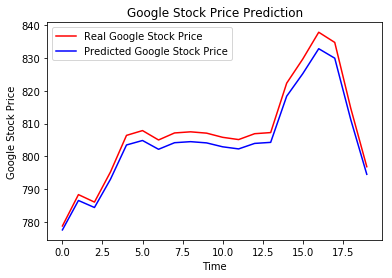

In [26]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [27]:
# It's a 1 timestep prediction, thats y its very accurate
# At time t, we're predicting the results for time t+1.

In [28]:
#Getting the real stock price of 2012-2016
real_stock_price_train = pd.read_csv('Google_Stock_Price_Train.csv')
real_stock_price_train = real_stock_price_train.iloc[:, 1:2].values
#Getting the predicted stock price of 2012-2016
predicted_stock_price_train = regressor.predict(X_train)
predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)

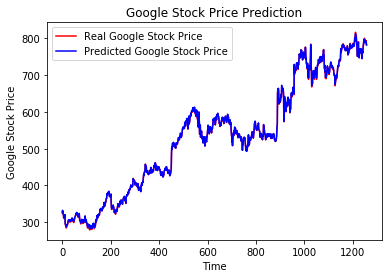

In [29]:
# Visualising the results
plt.plot(real_stock_price_train, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show() 

In [30]:
# Evaluating the RNN
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

In [31]:
rmse

3.160733660756426

In [32]:
# To get the percent of error value, we'll divide it with average value of stock price i.e 800
percent_rmse = rmse/800

In [33]:
percent_rmse

0.003950917075945533